<div><center>" Linear Regression on Real estate problem "<center> 
    - Mohamed Riaz (@racyriaz)
    </div>

# Hey there, Welcome!
#### In this notebook we shall solve a problem i.e to predict the house price in King County,  using Linear Regression model

### Import statements 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Loading data from the file path

In [2]:
df = pd.read_csv(r'C:/Users/riaz/learning/DATA/kc_house_data.csv')

#### lets check the shape of this dataset

In [3]:
df.shape

(21597, 21)

###  Woaah this dataset has too much data for a simple linear regression problem i.e it has about 21,597 **rows** (no of houses) of data with about 21 **column** (features)

Lets look out which features(columns) have high correlation with the column "price"

In [4]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

### extracting the columns (features) that have higher correlation with price column

In [5]:
df = df[['price','bathrooms','sqft_living','grade']]

Plotting these correlation in a heatmap for easy visualization

<AxesSubplot:>

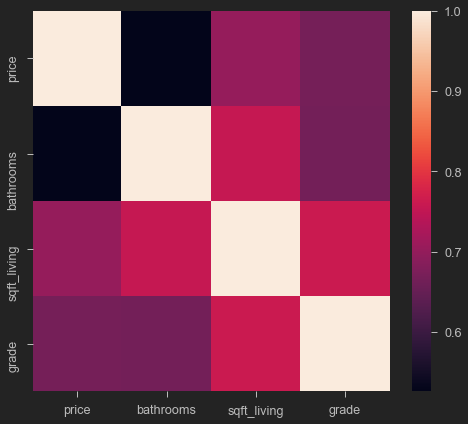

In [6]:
sns.heatmap(data=df.corr())

### Now, Splitting the x (given to the model) and y (model has to find) terms

Since we are doing Linear regression we require only a small sample of data to train our linear model, but in case of *neural networks*  we shall make use of full data set

In [7]:
df = df.sample(frac=0.05,random_state=101) # returns only 5% of data from 21,597 rows
x = df.drop(['price'],axis=1)
y = df['price']

Lets check how much sample data we have

In [8]:
x.shape

(1080, 3)

In [9]:
y.shape

(1080,)

#### Spliting dataFrame into Training data and Test data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# here 30 percent of the data will be used as test data and 70% of data will be used for training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
X_test.shape

(324, 3)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
#scaler = MinMaxScaler()
from sklearn import linear_model
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,f1_score

In [15]:
model = linear_model.LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
# predicting x_Test data, this is the data that the model hasnt seen before
prediction =  model.predict(X_test)

In [18]:
print(np.sqrt(mean_squared_error(y_test,prediction)))

217258.29992265417


In [19]:
r2_score(y_test,prediction)

0.5341686986894614

# plotting the linear curve

In [20]:
graph = pd.concat([X_test,y_test],axis=1)
gra = graph.sample(frac=0.3)
gra_prediction = model.predict(gra.drop('price',axis=1))

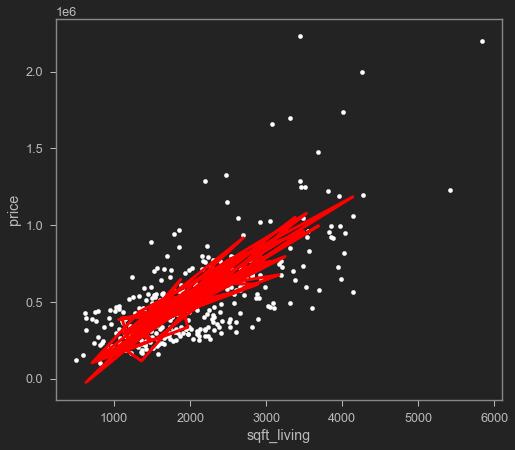

In [21]:
graph.plot(kind='scatter',x='sqft_living',y='price',color='White')
plt.plot(gra.sqft_living,gra_prediction,color='red',linewidth=3)

Since we have many outliers here in the data, our model was able to perfom only with a F1 score of about 53% which is not a good range! In the next notebook we shall test the same with "LOGISTIC REGRESSION MODEL"

# <div><center> Please do upvote to support!  Have a nice day <center>
    - Mohamed Riaz (@racyriaz)